# Movie sentiment analysis using NLP and classification models

## Pavel Makarov



In [5]:
# Load all libraries required for Week 5 assignment 
import pandas as pd
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Generate a data frame from the tsv file
table = pd.read_csv("labeledTrainData.tsv", sep = '\t')

In [9]:
# Drop na columns and display top 10 rows
table.dropna().head(10)

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
5,8196_8,1,I dont know why people think this is such a ba...
6,7166_2,0,"This movie could have been very good, but come..."
7,10633_1,0,I watched this video at a friend's house. I'm ...
8,319_1,0,"A friend of mine bought this film for £1, and ..."
9,8713_10,1,<br /><br />This movie is full of references. ...


In [11]:
# Create a function that will convert string to lower case
def Lower_caser(string: str) -> str:
    return string.lower()

In [13]:
# Apply Lower_caser() to each table row in review column and assign it to cleaned_review column
table['cleaned_review'] = table['review'].apply(lambda x: Lower_caser(x))
table.head(5)

,id,sentiment,review,cleaned_review
0,5814_8,1,With all this stuff going down at the moment w...,with all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...","\the classic war of the worlds\"" by timothy hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,the film starts with a manager (nicholas bell)...
3,3630_4,0,It must be assumed that those who praised this...,it must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,superbly trashy and wondrously unpretentious 8...


In [15]:
# Remove punctiation and special characters using regax and check first 5 rows
table['cleaned_review'] = table['cleaned_review'].str.replace('[^\w\s]', '')
table.head(5)

,id,sentiment,review,cleaned_review
0,5814_8,1,With all this stuff going down at the moment w...,with all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...","\the classic war of the worlds\"" by timothy hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,the film starts with a manager (nicholas bell)...
3,3630_4,0,It must be assumed that those who praised this...,it must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,superbly trashy and wondrously unpretentious 8...


In [17]:
# Remove stop words and check first 10 rows
stop_words = stopwords.words('english')
table['cleaned_review'] = table['cleaned_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
table.head(10)

,id,sentiment,review,cleaned_review
0,5814_8,1,With all this stuff going down at the moment w...,stuff going moment mj i've started listening m...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...","\the classic war worlds\"" timothy hines entert..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,film starts manager (nicholas bell) giving wel...
3,3630_4,0,It must be assumed that those who praised this...,must assumed praised film (\the greatest filme...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,superbly trashy wondrously unpretentious 80's ...
5,8196_8,1,I dont know why people think this is such a ba...,dont know people think bad movie. got pretty g...
6,7166_2,0,"This movie could have been very good, but come...","movie could good, comes way short. cheesy spec..."
7,10633_1,0,I watched this video at a friend's house. I'm ...,watched video friend's house. i'm glad waste m...
8,319_1,0,"A friend of mine bought this film for £1, and ...","friend mine bought film £1, even grossly overp..."
9,8713_10,1,<br /><br />This movie is full of references. ...,<br /><br />this movie full references. like \...


In [18]:
# Apply porter stemer to transform each word to its stem
porter = PorterStemmer()
table['cleaned_review'] = table['cleaned_review'].apply(lambda x: ' '.join([porter.stem(word) for word in x.split()]))

In [21]:
# Subset the necessary columns from cleaned df
table_cleaned = pd.DataFrame(table, columns=['cleaned_review', 'sentiment'])
table_cleaned.head()

,cleaned_review,sentiment
0,"stuff go moment mj i'v start listen music, wat...",1
1,"\the classic war worlds\"" timothi hine enterta...",1
2,film start manag (nichola bell) give welcom in...,0
3,must assum prais film (\the greatest film oper...,0
4,superbl trashi wondrous unpretenti 80' exploit...,1


In [23]:
# Assign features and target variables for modeling
target = table_cleaned['sentiment']
features = table_cleaned['cleaned_review']

In [25]:
# Split the data into training and testing sets at 80/20 ratio
features_train, features_test, target_train, target_test = train_test_split (features, target, test_size = 0.2, random_state = 34 )

In [27]:
# Initialize TF-IDF vectorizer and aplly transform and fit the training data 
tfidf = TfidfVectorizer()
feature_matrix_train = tfidf.fit_transform(features_train)

In [28]:
# Just transform the test data
feature_matrix_test = tfidf.transform(features_test)

In [34]:
# Check the size of the split data after TF-IDF
feature_matrix_train.shape

(20000, 64959)

In [36]:
# Check the size of the split data after TF-IDF
feature_matrix_test.shape

(5000, 64959)

## Logistic Regression Model

In [39]:
# Initiate Logistic regression model
logit = LogisticRegression(random_state = 0)

In [41]:
# Train the model on training set
model = logit.fit(feature_matrix_train, target_train)

### Accuracy of the logistic regression model

In [44]:
# Using cross validation calculate accuracy of the model
accuracy = cross_val_score(model, feature_matrix_test, target_test, scoring = "accuracy")
accuracy.mean()

0.8568000000000001

In [46]:
# Predict the results for training set
target_predicted = model.predict(feature_matrix_test)

In [48]:
# Using sklearn function, create a confusion matrix object
conf_matrix = confusion_matrix(target_test, target_predicted)

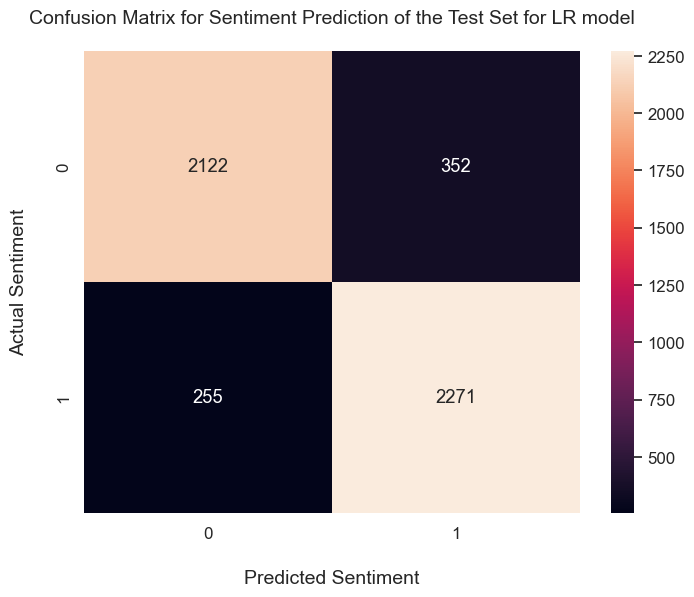

In [50]:
# Plot the confusion matrix for logistic regression model
# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', )
 
# Set x-axis label and ticks
ax.set_xlabel("Predicted Sentiment", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['0', '1'])
 
# Set y-axis label and ticks
ax.set_ylabel("Actual Sentiment", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['0', '1'])
 
# Set plot title
ax.set_title("Confusion Matrix for Sentiment Prediction of the Test Set for LR model", fontsize=14, pad=20)

# Show the plot
plt.show()

### Mean precision  for predictions (Logist R)

In [53]:
# Using cross validation from sklearn calculate average precision of the model
precision_pred = cross_val_score(model, feature_matrix_test, target_predicted, scoring = "precision")
precision_pred.mean()

0.8796052134753461

### Mean recall for predictions (Logist R)

In [56]:
# Using cross validation from sklearn calculate average recall of the model
recall_pred = cross_val_score(model, feature_matrix_test, target_predicted, scoring = "recall")
recall_pred.mean()

0.9550192657215559

### Mean F1 for predictions (Logist R)

In [59]:
# Using cross validation from sklearn calculate average F1 value of the model
f1_pred = cross_val_score(logit, feature_matrix_test, target_predicted, scoring = "f1")
f1_pred.mean()

0.9157393476708808

In [61]:
# Compute predicted probabilities for the test set
targed_predicted_probabilities = model.predict_proba(feature_matrix_test)[:,1]

In [63]:
# Using roc_curve funstion from sklearn calculate FPR and TPR values
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, targed_predicted_probabilities)

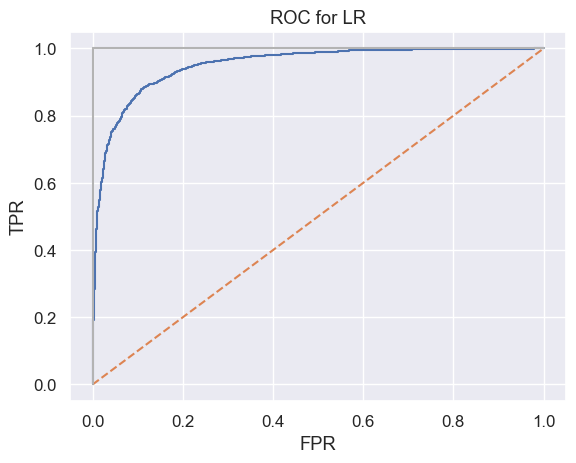

In [65]:
# Plot the ROC curve for logistic regression model

# Create a curve for actrual FPR/TPR values
plt.plot(false_positive_rate,true_positive_rate )

# Create a curve for random state
plt.plot([0,1], ls = "--")

# Create a curve for ideal case
plt.plot([0,0],[1,0],c =" .7"), plt.plot([1,1], c = " .7")

# Assign axis titel and plot title
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title("ROC for LR")

# Show the plot
plt.show()


## SVM

In [68]:
# Initiate SVM model
svc = LinearSVC(C = 0.5)

# Train SVM model on the training set
model2 = svc.fit(feature_matrix_train, target_train)

### Accuracy of SVM model

In [71]:
# Using cross validation calculate accuracy of the model
accuracy2 = cross_val_score(model2, feature_matrix_test, target_test, scoring = "accuracy")
accuracy2.mean()

0.8632

In [73]:
# Predict the values using generated SVM model on test set
target_predicted2 = model2.predict(feature_matrix_test)

In [75]:
# Create a confusion matrix for preidicted values vs actual
conf_matrix2 = confusion_matrix(target_test, target_predicted2)

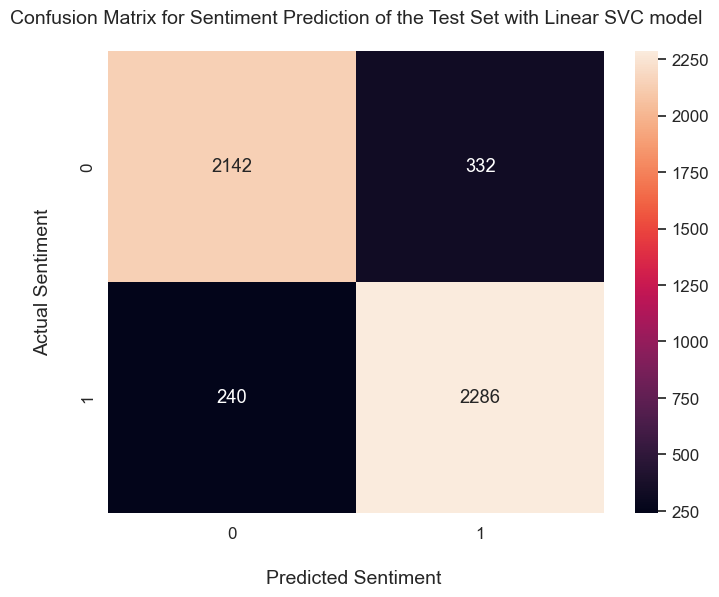

In [77]:
# Plot the confusion matrix for logistic regression model
# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)
 
# Create a curve for actrual FPR/TPR values 
ax = sns.heatmap(conf_matrix2, annot=True, fmt='d', )
 
# Set x-axis label and ticks
ax.set_xlabel("Predicted Sentiment ", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['0', '1'])
 
# Set y-axis label and ticks
ax.set_ylabel("Actual Sentiment", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['0', '1'])
 
# Set plot title
ax.set_title("Confusion Matrix for Sentiment Prediction of the Test Set with Linear SVC model", fontsize=14, pad=20)
 
# Show the plot
plt.show()

### Mean precision  for predictions (SVM)

In [80]:
# Using cross validation from sklearn calculate average precision of the model
precision_pred = cross_val_score(model, feature_matrix_test, target_predicted, scoring = "precision")
precision_pred.mean()

0.8796052134753461

### Mean recall for predictions (SVM)

In [83]:
# Using cross validation from sklearn calculate average recall of the model
precision_pred2 = cross_val_score(model2, feature_matrix_test, target_predicted2, scoring = "precision")
precision_pred2.mean()

0.8955997588245618

### Mean F1 for predictions (SVM)

In [86]:
# Using cross validation from sklearn calculate average F1 value of the model
f1_pred2 = cross_val_score(model2, feature_matrix_test, target_predicted2, scoring = "f1")
f1_pred2.mean()

0.9139298211019948

In [88]:
# Use calibrated model to obtain probabiilities
calibrated_svc = CalibratedClassifierCV(model2, method='sigmoid')

In [90]:
# Trin calibrated model on training data
calibrated_svc.fit(feature_matrix_train, target_train)

CalibratedClassifierCV(estimator=LinearSVC(C=0.5))

In [91]:
# Predict probabilities for calibrated model on the test set
target_predicted_probabilities2 = calibrated_svc.predict_proba(feature_matrix_test)[:, 1]

In [94]:
# Calculate FPR and TPR
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(target_test, targed_predicted_probabilities)

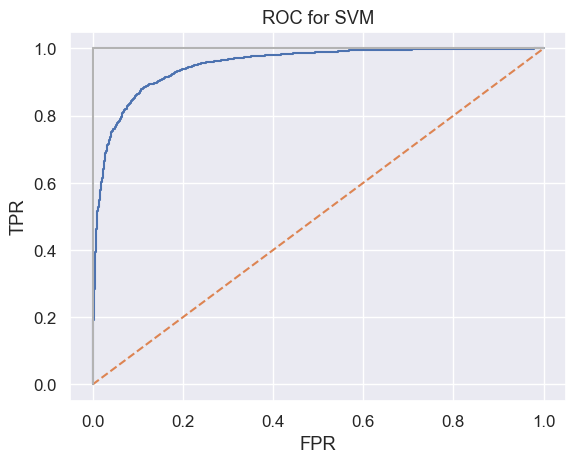

In [96]:
# Generate a plot for actual FPR and TPR
plt.plot(false_positive_rate2,true_positive_rate2 )

# Generate a plot for random state
plt.plot([0,1], ls = "--")

# Generate a plot for ideal state
plt.plot([0,0],[1,0],c =" .7"), plt.plot([1,1], c = " .7")


# Assign axis name and plot title
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title("ROC for SVM")

# Show the plot
plt.show()